# 4 варіант

Fashion MNIST

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Використовуємо pandas тому що так набагато швидше завантажуються дані
train = pd.read_csv('/content/drive/MyDrive/fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/fashionmnist/fashion-mnist_test.csv')

labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Перевіримо нормалізацію

In [2]:
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


Дані потрібно буде нормалізувати

In [3]:
X_train, y_train_not_encoded = train.iloc[:, 1:].values, train['label'].values
X_test, y_test_not_encoded = test.iloc[:, 1:].values, test['label'].values
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}, y_train shape: {y_train_not_encoded.shape}, y_test shape: {y_test_not_encoded.shape}, ')

X_train shape: (60000, 784), X_test shape: (10000, 784), y_train shape: (60000,), y_test shape: (10000,), 


In [4]:
X_train = X_train = ((X_train / 255.) - .5) * 2
X_test = X_test = ((X_test / 255.) - .5) * 2

OHE = OneHotEncoder(categories=[np.arange(10)])

y_train_encoded = OHE.fit_transform(y_train_not_encoded.reshape(-1, 1)).toarray()
y_test_encoded = OHE.transform(y_test_not_encoded.reshape(-1, 1)).toarray()

In [5]:
pd.DataFrame(X_train[:, 0:10]).describe()

,0,1,2,3,4,5,6,7,8,9
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,-0.999993,-0.999952,-0.999723,-0.999201,-0.998055,-0.996773,-0.993680,-0.982759,-0.955435,-0.886363
std,0.000743,0.002126,0.009587,0.019238,0.033780,0.045774,0.064433,0.110536,0.186819,0.300663
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,-0.874510,-0.717647,0.772549,0.286275,0.780392,0.803922,0.756863,1.000000,0.992157,1.000000


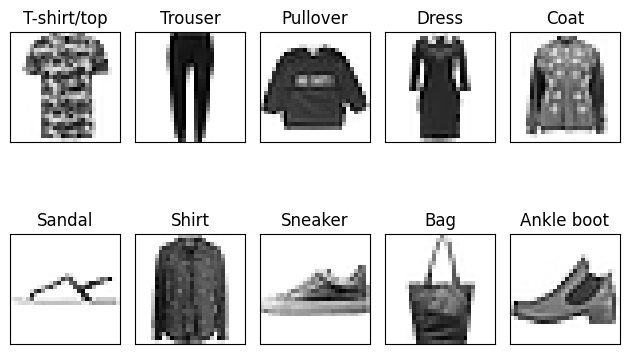

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train_not_encoded == i][0].reshape(28, 28)
    ax[i].set_title(f'{labels[i]}')
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [7]:
X_train, X_test, y_train_encoded, y_test_encoded = tf.constant(X_train, dtype=tf.float32), tf.constant(X_test, dtype=tf.float32), \
                                    tf.constant(y_train_encoded, dtype=tf.float32), tf.constant(y_test_encoded, dtype=tf.float32)

# Модель:

## Пряме розповсюдження

Цей код здебільшого оснований на цій прикладах:

https://ruslanmv.com/blog/Neural-Networks-in-Tensorflow

https://www.kaggle.com/code/enriqueabad/using-tensorflow-from-scratch-without-keras/notebook

In [8]:
class Feedforward(tf.Module):
    def __init__(self, in_features, out_features):
        self.w = tf.Variable(tf.random.normal([in_features, out_features]))
        self.b = tf.Variable(tf.random.normal([1]))

    def forward_pass(self, X):
        return (tf.matmul(X, self.w) + self.b)

    def compute_loss(self, logits, labels):
        loss = tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits)
        return tf.reduce_mean(loss)

    def train_step(self, X, y, lrn_rt):

        with tf.GradientTape() as tape:
            logits = self.forward_pass(X)
            loss = self.compute_loss(logits=logits, labels=y)

        dw, db = tape.gradient(loss, [self.w, self.b])

        self.w.assign_sub(lrn_rt * dw)
        self.b.assign_sub(lrn_rt * db)

        return loss.numpy() 

    def fit(self, X_train, y_train, X_test, y_test, epochs, lrn_rt=1e-2):
        
        history = {
            'train_loss': [],
            'val_loss': [],
            'train_acc': [],
            'val_acc': []
        }

        for epoch in range(epochs): 
            loss = self.train_step(X_train, y_train, lrn_rt=lrn_rt)
            
            history['train_loss'].append(loss)
            history['val_loss'].append(self.compute_loss(self.forward_pass(X_test), y_test).numpy())  

            history['train_acc'].append(accuracy_score(tf.argmax(y_train, axis=1), self.predict(X_train)))
            history['val_acc'].append(accuracy_score(tf.argmax(y_test, axis=1), self.predict(X_test)))

            if epoch % 50 == 0:
                print(f'Epoch {epoch}')
                print(f"Train loss: {history['train_loss'][-1]}")
                print(f"Val loss: {history['val_loss'][-1]}")
                print(f"Train acc: {history['train_acc'][-1]}")
                print(f"Val acc: {history['val_acc'][-1]}")

        return history

    def predict(self, X):
        return tf.argmax(self.forward_pass(X), axis=1)

In [9]:
%%time

n_epochs = 400

feedforward_model = Feedforward(X_train.shape[1], y_train_encoded.shape[1])

history = feedforward_model.fit(X_train, y_train_encoded, X_test, y_test_encoded, epochs=n_epochs, lrn_rt=0.3)

Epoch 0
Train loss: 50.09254455566406
Val loss: 31.954206466674805
Train acc: 0.10613333333333333
Val acc: 0.1046
Epoch 50
Train loss: 3.3994901180267334
Val loss: 3.463074207305908
Train acc: 0.6309
Val acc: 0.6276
Epoch 100
Train loss: 2.7050845623016357
Val loss: 2.766061305999756
Train acc: 0.6859333333333333
Val acc: 0.6831
Epoch 150
Train loss: 2.379328727722168
Val loss: 2.434943675994873
Train acc: 0.7113833333333334
Val acc: 0.7104
Epoch 200
Train loss: 2.1728086471557617
Val loss: 2.2241628170013428
Train acc: 0.7267166666666667
Val acc: 0.7223
Epoch 250
Train loss: 2.023975372314453
Val loss: 2.0717999935150146
Train acc: 0.73745
Val acc: 0.7328
Epoch 300
Train loss: 1.908361554145813
Val loss: 1.9537781476974487
Train acc: 0.7445333333333334
Val acc: 0.7407
Epoch 350
Train loss: 1.8146125078201294
Val loss: 1.8585615158081055
Train acc: 0.7511833333333333
Val acc: 0.7471
CPU times: user 7.12 s, sys: 382 ms, total: 7.5 s
Wall time: 7.32 s


Text(0.5, 1.0, 'Loss')

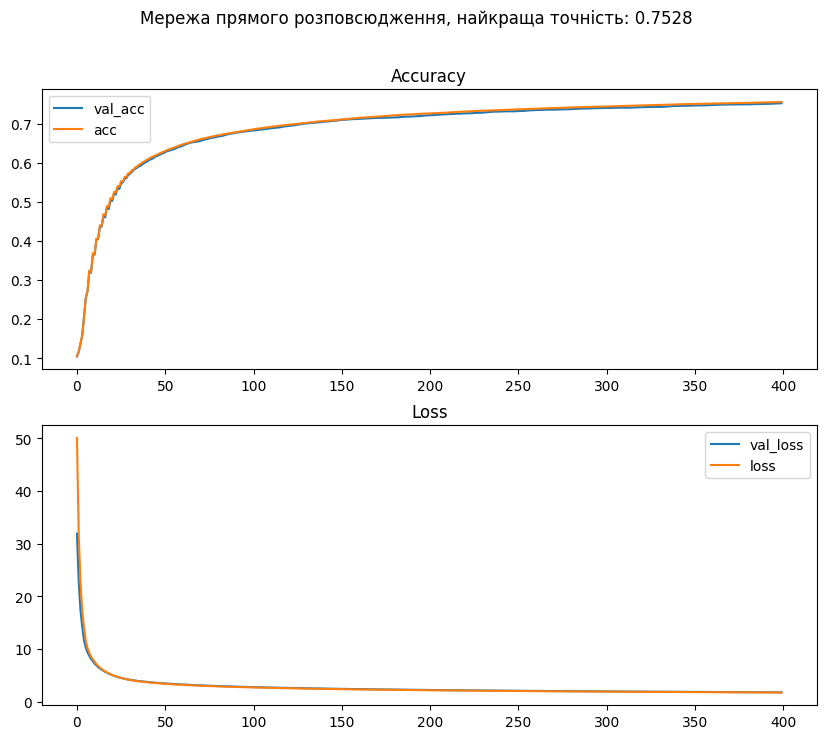

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'Мережа прямого розповсюдження, найкраща точність: {max(history["val_acc"])}')

ax[0].plot(history['val_acc'], label='val_acc')
ax[0].plot(history['train_acc'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')

ax[1].plot(history['val_loss'], label='val_loss')
ax[1].plot(history['train_loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Як ми бачимо графіки зміни функції втрат та точності гладкі, це означає, що наша модель стабільно і гарно навчалась, значення точності не дуже високе, спробуємо додати ще декілька шарів і отримати значення краще

## Модель з декількома шарами:

In [19]:
class MLP(tf.Module):
    def __init__(self, layers, act_func='relu'):
        self.layers = layers
        self.L = len(layers)
        self.num_features = layers[0]
        self.num_classes = layers[-1]
        self.W = {}
        self.b = {}
        
        self.dW = {}
        self.db = {}
        
        self.act_func = act_func
        
        self.setup()

    def setup(self):
        for i in range(1, self.L):
            self.W[i] = tf.Variable(tf.random.normal(shape=(self.layers[i],self.layers[i-1])))
            self.b[i] = tf.Variable(tf.random.normal(shape=(self.layers[i], 1)))
            
    def forward_pass(self, X):
        if self.act_func == 'relu':
            for i in range(1, self.L):
                Z = tf.matmul(X, tf.transpose(self.W[i])) + tf.transpose(self.b[i])
                if i != self.L-1:
                    X = tf.nn.relu(Z)
                else:
                    X = Z
        elif self.act_func == 'leaky_relu':
            for i in range(1, self.L):
                Z = tf.matmul(X, tf.transpose(self.W[i])) + tf.transpose(self.b[i])
                if i != self.L-1:
                    X = tf.nn.leaky_relu(Z)
                else:
                    X = Z
        elif self.act_func == 'elu':
            for i in range(1, self.L):
                Z = tf.matmul(X, tf.transpose(self.W[i])) + tf.transpose(self.b[i])
                if i != self.L-1:
                    X = tf.nn.elu(Z)
                else:
                    X = Z
        else: 
            raise ValueError("only 'relu', 'leaky_relu', 'elu' are allowed for act_fn arg")
        return X

    def compute_loss(self, logits, labels):
        loss = tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits)
        return tf.reduce_mean(loss)

    def update_params(self, lr):
        for i in range(1,self.L):
            self.W[i].assign_sub(lr * self.dW[i])
            self.b[i].assign_sub(lr * self.db[i])
            
    def train_step(self, X, y, lrn_rt):
        with tf.GradientTape(persistent=True) as tape:
            A = self.forward_pass(X)
            loss = self.compute_loss(A, y)
        for i in range(1, self.L):
            self.dW[i] = tape.gradient(loss, self.W[i])
            self.db[i] = tape.gradient(loss, self.b[i])
        del tape
        self.update_params(lrn_rt)
        return loss.numpy()

    def train(self, X_train, y_train, X_test, y_test, epochs, batch_size, lrn_rt):

        history = {
            'train_loss': [],
            'val_loss': [],
            'train_acc': [],
            'val_acc': []
        }
        
        steps_per_epoch = int(X_train.shape[0]/batch_size)

        for epoch in range(epochs): 
            epoch_train_loss = 0.
            for i in range(0, steps_per_epoch):
                X_batch = X_train[i*batch_size:(i+1)*batch_size]
                y_batch = y_train[i*batch_size:(i+1)*batch_size]
                
                batch_loss = self.train_step(X_batch, y_batch, lrn_rt)
                epoch_train_loss += batch_loss
                
            history['train_loss'].append(epoch_train_loss/steps_per_epoch)
            history['val_loss'].append(self.compute_loss(self.forward_pass(X_test), y_test).numpy())  

            history['train_acc'].append(accuracy_score(tf.argmax(y_train, axis=1), self.predict(X_train)))
            history['val_acc'].append(accuracy_score(tf.argmax(y_test, axis=1), self.predict(X_test)))
        
            if epoch % 2 == 0:
                print(f'Epoch {epoch}')
                print(f"Train loss: {history['train_loss'][-1]}")
                print(f"Val loss: {history['val_loss'][-1]}")
                print(f"Train acc: {history['train_acc'][-1]}")
                print(f"Val acc: {history['val_acc'][-1]}")
                
        return history

    def predict(self, X):
        return tf.argmax(self.forward_pass(X), axis=1)

### Модель з relu

In [20]:
%%time 

relu_model = MLP([X_train.shape[1], 64, 64, y_train_encoded.shape[1]], act_func='relu')
batch_size = 120
epochs = 20 
lrn_rt = 3e-3

history = relu_model.train(
    X_train,y_train_encoded,
    X_test, y_test_encoded,
    epochs, 
    batch_size, lrn_rt)

Epoch 0
Train loss: 0.5054742097854614
Val loss: 0.4143175780773163
Train acc: 0.8181999921798706
Val acc: 0.848800003528595
Epoch 2
Train loss: 0.35623037815093994
Val loss: 0.38615939021110535
Train acc: 0.8699666857719421
Val acc: 0.857200026512146
Epoch 4
Train loss: 0.3171066343784332
Val loss: 0.3316633701324463
Train acc: 0.883650004863739
Val acc: 0.8773999810218811
Epoch 6
Train loss: 0.2921540439128876
Val loss: 0.3294029235839844
Train acc: 0.8920666575431824
Val acc: 0.8858000040054321
Epoch 8
Train loss: 0.27263712882995605
Val loss: 0.3287326395511627
Train acc: 0.8977166414260864
Val acc: 0.8847000002861023
Epoch 10
Train loss: 0.2596154808998108
Val loss: 0.3416062891483307
Train acc: 0.9029499888420105
Val acc: 0.8809000253677368
Epoch 12
Train loss: 0.24801166355609894
Val loss: 0.3405507504940033
Train acc: 0.9075833559036255
Val acc: 0.8787999749183655
Epoch 14
Train loss: 0.23626264929771423
Val loss: 0.38405606150627136
Train acc: 0.9114166498184204
Val acc: 0.873

Text(0.5, 1.0, 'Loss')

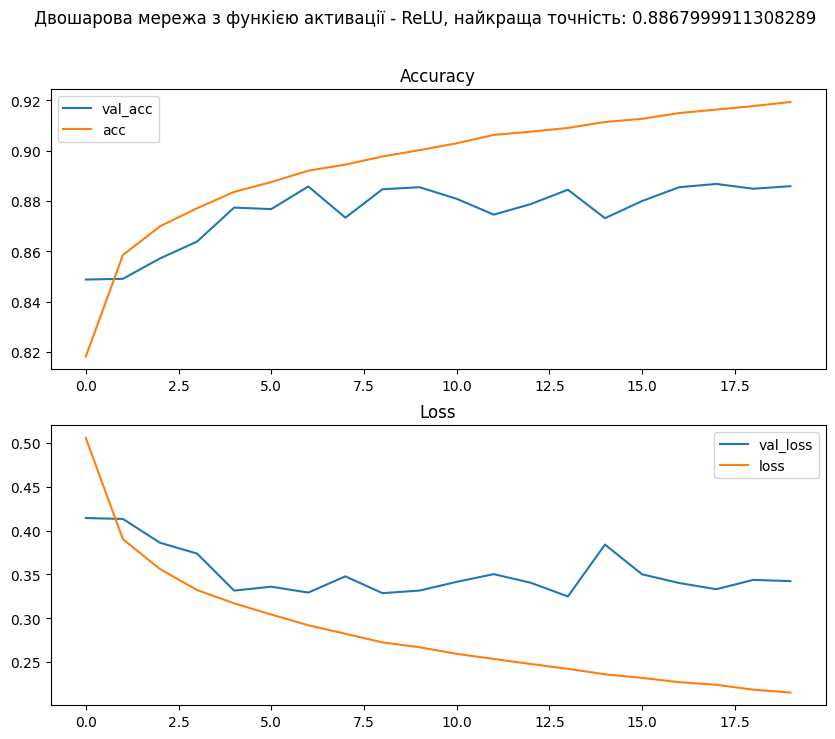

In [21]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'Двошарова мережа з функією активації - ReLU, найкраща точність: {max(history["val_acc"])}')

ax[0].plot(history['val_acc'], label='val_acc')
ax[0].plot(history['train_acc'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')

ax[1].plot(history['val_loss'], label='val_loss')
ax[1].plot(history['train_loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Як ми бачимо більш глибока модель пристосувалась набагато краще, ми отримали більше високе значення точності, графіки також гладкі, що дуже добре, ще трохи і модель почала би перенавчатися, тому більша кількість епох не була б доцільною

Але час навчання був сильно більший, у прямої моделі у нас було 400 епох за ~8 секунд, тут 20 епох за півтори хвилини

### Модель з LeakyReLU

In [22]:
%%time 

l_relu_model = MLP([X_train.shape[1], 64, 64, y_train_encoded.shape[1]], act_func='leaky_relu')
batch_size = 120
epochs = 20 
lrn_rt = 3e-3

history = l_relu_model.train(
    X_train,y_train_encoded,
    X_test, y_test_encoded,
    epochs, 
    batch_size, lrn_rt)

Epoch 0
Train loss: 0.5041302442550659
Val loss: 0.43212202191352844
Train acc: 0.8197333216667175
Val acc: 0.8450000286102295
Epoch 2
Train loss: 0.3635198473930359
Val loss: 0.3639447093009949
Train acc: 0.8673999905586243
Val acc: 0.8702999949455261
Epoch 4
Train loss: 0.3221074938774109
Val loss: 0.3385985195636749
Train acc: 0.8823333382606506
Val acc: 0.8779000043869019
Epoch 6
Train loss: 0.29546406865119934
Val loss: 0.35451942682266235
Train acc: 0.8917833566665649
Val acc: 0.8733000159263611
Epoch 8
Train loss: 0.27976709604263306
Val loss: 0.3371683955192566
Train acc: 0.8974833488464355
Val acc: 0.8776999711990356
Epoch 10
Train loss: 0.2665012776851654
Val loss: 0.3439007103443146
Train acc: 0.9012500047683716
Val acc: 0.8769999742507935
Epoch 12
Train loss: 0.2503640055656433
Val loss: 0.3392220735549927
Train acc: 0.9071499705314636
Val acc: 0.8822000026702881
Epoch 14
Train loss: 0.23868557810783386
Val loss: 0.3302609622478485
Train acc: 0.9104166626930237
Val acc: 0.8

Text(0.5, 1.0, 'Loss')

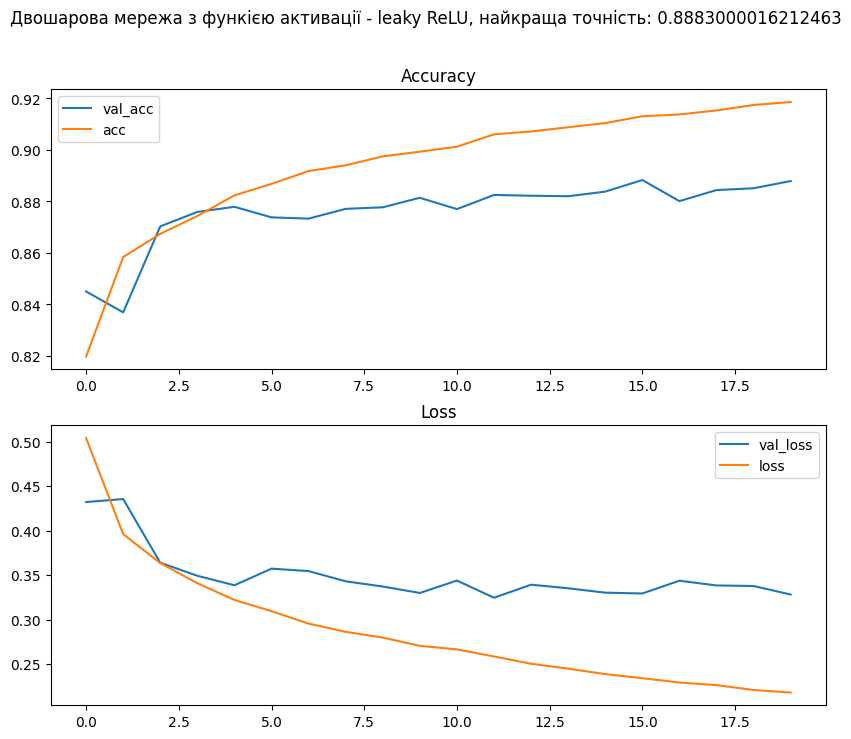

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'Двошарова мережа з функією активації - leaky ReLU, найкраща точність: {max(history["val_acc"])}')

ax[0].plot(history['val_acc'], label='val_acc')
ax[0].plot(history['train_acc'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')

ax[1].plot(history['val_loss'], label='val_loss')
ax[1].plot(history['train_loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Тут ситуація майже ідентична на ReLU

### ELU

In [27]:
%%time 

elu_model = MLP([X_train.shape[1], 64, 64, y_train_encoded.shape[1]], act_func='elu')
batch_size = 120
epochs = 20 
lrn_rt = 3e-3

history = elu_model.train(
    X_train,y_train_encoded,
    X_test, y_test_encoded,
    epochs, 
    batch_size, lrn_rt)

Epoch 0
Train loss: 0.5017162561416626
Val loss: 0.41165220737457275
Train acc: 0.8207333087921143
Val acc: 0.8518999814987183
Epoch 2
Train loss: 0.3529786169528961
Val loss: 0.3565202057361603
Train acc: 0.8699666857719421
Val acc: 0.8707000017166138
Epoch 4
Train loss: 0.31509459018707275
Val loss: 0.3391253650188446
Train acc: 0.8835499882698059
Val acc: 0.8737999796867371
Epoch 6
Train loss: 0.2876329720020294
Val loss: 0.34461790323257446
Train acc: 0.8930000066757202
Val acc: 0.8765000104904175
Epoch 8
Train loss: 0.27069732546806335
Val loss: 0.3297923803329468
Train acc: 0.9002000093460083
Val acc: 0.8824999928474426
Epoch 10
Train loss: 0.2559167444705963
Val loss: 0.3188019096851349
Train acc: 0.9044666886329651
Val acc: 0.8863000273704529
Epoch 12
Train loss: 0.24214310944080353
Val loss: 0.32467377185821533
Train acc: 0.9104499816894531
Val acc: 0.8888999819755554
Epoch 14
Train loss: 0.23172155022621155
Val loss: 0.37062177062034607
Train acc: 0.9129999876022339
Val acc: 

Text(0.5, 1.0, 'Loss')

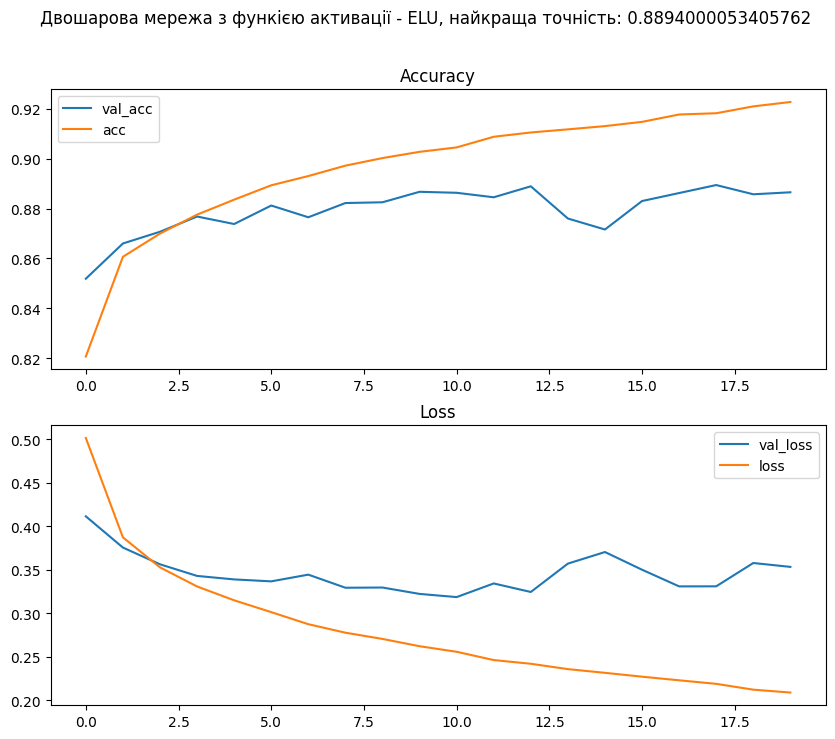

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'Двошарова мережа з функією активації - ELU, найкраща точність: {max(history["val_acc"])}')

ax[0].plot(history['val_acc'], label='val_acc')
ax[0].plot(history['train_acc'], label='acc')
ax[0].legend()
ax[0].set_title('Accuracy')

ax[1].plot(history['val_loss'], label='val_loss')
ax[1].plot(history['train_loss'], label='loss')
ax[1].legend()
ax[1].set_title('Loss')

Тут ситуація майже ідентична до попередніх

## Неправильно класифіковані зображення найкращою моделлю

У нас майже усі двошарові моделі однакові, тому будемо використовувати з elu шаром активації

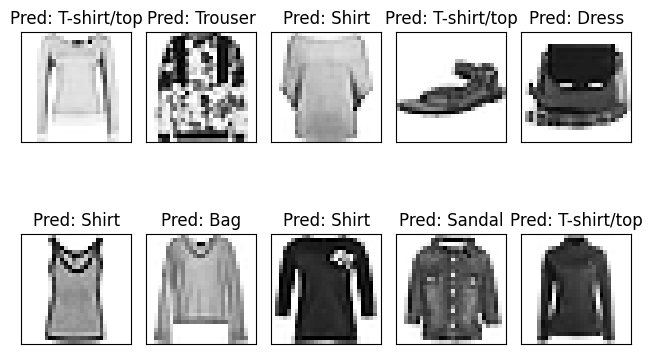

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

pred_labels = elu_model.predict(X_test)
misclassified_indices = np.where(pred_labels != y_test_not_encoded)[0]

for i in range(10):
    misclassified_image = X_test.numpy()[misclassified_indices[i]].reshape(28, 28)

    ax[i].imshow(misclassified_image, cmap='Greys')  
    ax[i].set_title(f"Pred: {labels[pred_labels[i]]}")

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

Деякі з них справді схожі на те, що модель спрогнозувала, але не усі, ми бачимо, що у нас куртка помічена як босоніжка

# Висновки:
Безшарова модель не показала себе гарно на датасеті і отримала \~0.75 точності на валідаційному датасеті, двошарові моделі показали усі себе майже однаково, час навчання (півтори хвилини), значення точності на валідаційному датасеті (~0.88) були дуже схожі, тому тут не можливо виділити лідера